### **Introduction**

Churn rate is the percentage of subscribers to a service that discontinue their subscription to that service in a given time period.

Customers are moving to other competitor companies due to below reasons.

   - Poor service.
   - Availability of features and content.
   - Lower cost substitutes from competitors/ better offer from competitor.
   - Negative customer service experiences
   - Some unkown reasons


### **Problem Statement**

   - Reduce customer churn rate
   - Analysis high risk customer group(customer group whose churn rate is more comapred to other clusters/customers)
   - Predict whether the given customer will churn or not
   
### **Stakeholders**
   - CEO
   - Product Marketing Heads/Managers
  
### **Pain Point**
   - To reduce loss of customer & increase revenue

### Business Metric
   - To reduce churn rate by 5%
   - To increase customer base
   
### Data Science Metric
FN :Predicted customer will leave but in actual he will not <br>
FP : Predicted will not leave but in actual he have left

In [24]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [40]:
# Code starts here
train = pd.read_csv('data/train.csv')
train
# Code ends here

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1370,7596-IIWYC,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,5676,9103-CXVOK,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,1645,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,366,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,335,4322-RCYMT,Male,0,Yes,Yes,68,Yes,Yes,DSL,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.80,5293.95,Yes
5630,4714,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9,No
5631,2004,8565-CLBZW,Male,0,No,No,24,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,89.85,2165.05,Yes
5632,227,2232-DMLXU,Female,0,Yes,No,1,Yes,No,DSL,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2,Yes


In [3]:
# Shape of data
train.shape

(5634, 22)

In [4]:
train.describe()

,Id,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,3520.088569,0.161519,32.075790,64.671166
std,2028.634870,0.368042,24.492631,30.177218
min,0.000000,0.000000,0.000000,18.250000
25%,1767.250000,0.000000,9.000000,35.275000
50%,3512.000000,0.000000,28.000000,70.350000
75%,5282.750000,0.000000,55.000000,90.050000
max,7042.000000,1.000000,72.000000,118.750000


In [9]:
type(train['TotalCharges'])

pandas.core.series.Series

In [6]:
#Check missing values
train.isna().sum()

Id                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Value counts of target coloumn
train['Churn'].value_counts()

No     4120
Yes    1514
Name: Churn, dtype: int64

## **Visualize the data**

<AxesSubplot:xlabel='Churn', ylabel='count'>

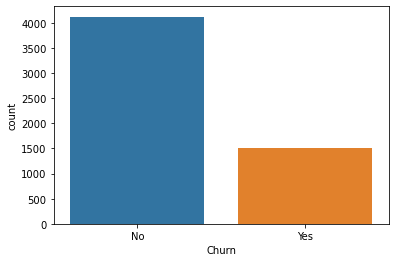

In [6]:
# Graphical count of customer churn
sns.countplot(train['Churn'])

In [4]:
# To check the percentage of customers that are leaving

num_retianed = train[train.Churn == 'No'].shape[0]
num_churned = train[train.Churn == 'Yes'].shape[0]

#Print the percentage of customers that stayed
print(num_retianed/(num_retianed+num_churned)*100, '% of customers stayed in the company')
#Print the percentage of customers that left
print(num_churned/(num_retianed+num_churned)*100, '% of customers left the company')

73.12744053958112 % of customers stayed in the company
26.872559460418888 % of customers left the company


## Churn count for both males & females

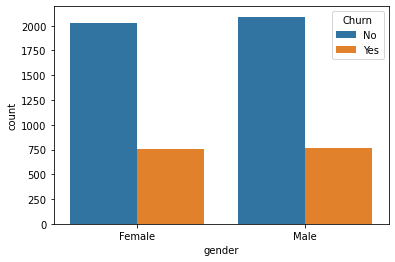

In [7]:
sns.countplot(x='gender',hue = 'Churn', data= train);

**Insights:** No impact of churn rate with specific gender<br>
**Recommendation:** Focus on both the genders.

## Churn count for internet services

<AxesSubplot:xlabel='InternetService', ylabel='count'>

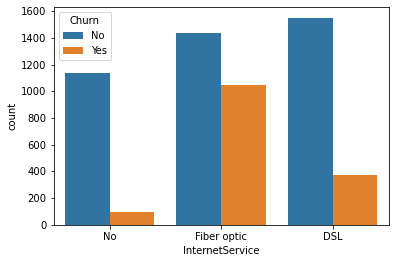

In [11]:
sns.countplot(x='InternetService', hue='Churn', data = train)

**Insights:** Customer with Fiber optic service tends to have higher churn rate compared to others<br>
**Recommendation:** Company needs to look for reason of higher churn rate into Fiber optic service provider department 

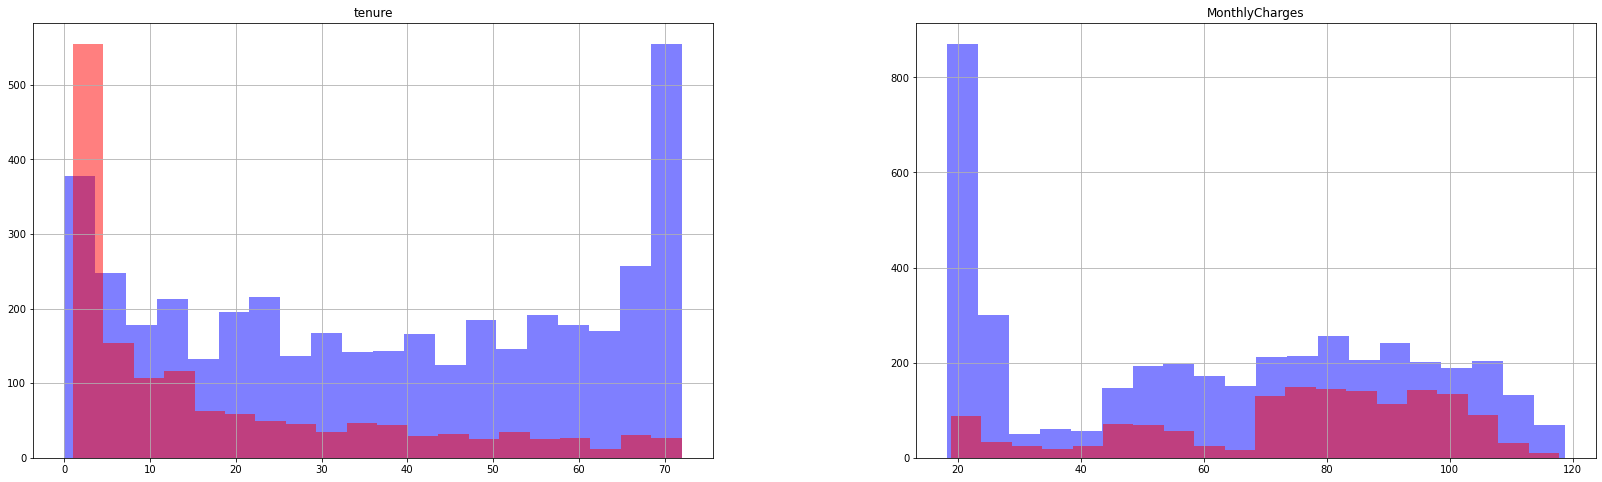

In [5]:
num_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28,8))
train[train.Churn == 'No'][num_features].hist(bins = 20, color='blue', alpha = 0.5, ax=ax)
train[train.Churn == 'Yes'][num_features].hist(bins = 20, color='red', alpha = 0.5, ax=ax);

**Insights**<br>
**Tenure :** For low tenure churn rate is higher whereas with high tenure churn rate is pretty low<br>
**Monthly Charges :** Customer churn rate is high when charges exceeds 70<br>

**Recommendation**<br>
**Tenure :** Try to include more long tenure plans<br>
**Monthky Charges :** To keep existing customers & acquire new customer keep the monthly charges below 70

In [12]:
# Create new subset with Monthly charges exceeding 70
df_new = train[train['MonthlyCharges']>70]

<AxesSubplot:xlabel='InternetService', ylabel='count'>

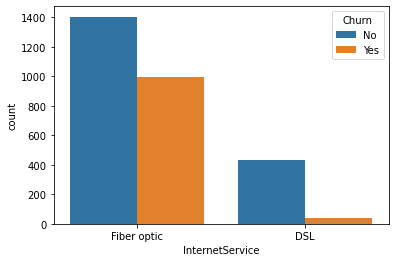

In [11]:
sns.countplot(x='InternetService', hue='Churn', data = df_new)

**Insights:** Fiber optic have charges more than 70<br>
**Recommendation:** Kindly look for the competitor prices & services. Contact with existing & non-existing customers for feedback  

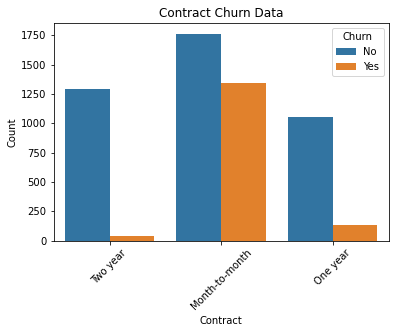

In [17]:
#Contract Churn Rate
sns.countplot(train['Contract'],hue=train['Churn'])
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract Churn Data')
plt.xticks(rotation=45);

**Insight:** Month-to-month contract has high Churn Rate.<br>
**Recommendation:** Provide customer with packages with quaterly & semi-annual contract.

# Feature Engineering

In [11]:
# Code Starts here
train = train.drop('customerID', axis =1)
# Code ends here

In [10]:
#Replacing spaces with 'NaN' in train dataset
train['TotalCharges'].replace(' ',np.NaN, inplace=True)

#Converting the type of column from X_train to float
train['TotalCharges'] = train['TotalCharges'].astype(float)

#Filling missing values
train['TotalCharges'].fillna(train['TotalCharges'].mean(),inplace=True)
# test['TotalCharges'].fillna(train['TotalCharges'].mean(), inplace=True)

In [12]:
#Convert all non-numeric columns to numeric 
for column in train.columns:
    if train[column].dtype == np.number:
        continue
    train[column] = LabelEncoder().fit_transform(train[column])
    

In [13]:
# To check dtypes
train.dtypes

Id                    int64
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [14]:
train.corr()

,Id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Id,1.000000,-0.009507,0.005225,-0.002615,0.001807,0.008353,-0.027008,-0.005665,-0.001766,0.007574,...,-0.002294,0.002778,-0.005301,-0.022339,0.005255,0.000142,0.021121,-0.018570,-0.001558,0.000083
gender,-0.009507,1.000000,-0.002559,0.001405,0.016551,-0.000901,-0.009100,-0.020542,-0.001532,-0.024294,...,0.008494,-0.001671,0.002345,-0.002522,0.007070,-0.002362,0.020832,-0.016036,-0.001008,-0.004329
SeniorCitizen,0.005225,-0.002559,1.000000,0.030336,-0.203950,0.026823,0.002462,0.148820,-0.043003,-0.131719,...,-0.007365,-0.150035,0.041384,0.063616,-0.139937,0.153214,-0.042480,0.227606,0.114288,0.151732
Partner,-0.002615,0.001405,0.030336,1.000000,0.450194,0.379378,0.020985,0.141687,0.010114,0.152532,...,0.167621,0.120429,0.124379,0.130106,0.289554,-0.027336,-0.155145,0.092356,0.315334,-0.151653
Dependents,0.001807,0.016551,-0.203950,0.450194,1.000000,0.160499,0.002272,-0.027696,0.042555,0.161968,...,0.087291,0.135168,0.038292,0.020792,0.244473,-0.105486,-0.036673,-0.112758,0.067310,-0.171648
tenure,0.008353,-0.000901,0.026823,0.379378,0.160499,1.000000,0.012829,0.342546,-0.014933,0.321572,...,0.370768,0.319787,0.290031,0.298498,0.671260,0.001573,-0.377989,0.244162,0.822968,-0.351598
PhoneService,-0.027008,-0.009100,0.002462,0.020985,0.002272,0.012829,1.000000,-0.021138,0.390248,-0.010066,...,-0.002147,-0.011736,0.047852,0.053231,0.006604,0.012392,-0.009900,0.247079,0.114592,0.012515
MultipleLines,-0.005665,-0.020542,0.148820,0.141687,-0.027696,0.342546,-0.021138,1.000000,-0.106991,0.006508,...,0.108733,0.002981,0.173073,0.180521,0.110553,0.164679,-0.177618,0.436287,0.453762,0.044104
InternetService,-0.001766,-0.001532,-0.043003,0.010114,0.042555,-0.014933,0.390248,-0.106991,1.000000,-0.013036,...,0.048778,-0.014065,0.102128,0.108239,0.108912,-0.136533,0.079433,-0.320720,-0.166218,-0.049542
OnlineSecurity,0.007574,-0.024294,-0.131719,0.152532,0.161968,0.321572,-0.010066,0.006508,-0.013036,1.000000,...,0.171345,0.292574,0.053197,0.058040,0.376497,-0.168525,-0.101626,-0.060525,0.248385,-0.287888


### Model building

In [15]:
# Sclae the data
X = train.drop('Churn', axis = 1)
y = train['Churn']

In [16]:
X = StandardScaler().fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

In [22]:
# Fit Model
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(accuracy_score(y_test, predict))

0.7959787108219988


In [36]:
#Fitting AdaBoost
ada_clf = AdaBoostClassifier(random_state =3)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
ada_score = accuracy_score(y_test, y_pred_ada)
print('Score of AdaBoost : ', ada_score)

#Finding the confusion matrix
ada_cm=confusion_matrix(y_test,y_pred_ada)
print('Confusion matrix: \n', ada_cm)

#Finding the classification report
ada_cr=classification_report(y_test,y_pred_ada)
print('Classification report: \n', ada_cr)

Score of AdaBoost :  0.7900650502661147
Confusion matrix: 
 [[1086  158]
 [ 197  250]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1244
           1       0.61      0.56      0.58       447

    accuracy                           0.79      1691
   macro avg       0.73      0.72      0.72      1691
weighted avg       0.78      0.79      0.79      1691



In [31]:
xgb_clf = XGBClassifier(random_state = 3)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred_xgb)
print('Score of XG Boost :',xgb_score)

#Finding the confusion matrix
xgb_cm=confusion_matrix(y_test,y_pred_xgb)
print('Confusion matrix: \n', xgb_cm)

#Finding the classification report
xgb_cr=classification_report(y_test,y_pred_xgb)
print('Classification report: \n', xgb_cr)

Score of XG Boost : 0.7717327025428741
Confusion matrix: 
 [[1081  163]
 [ 223  224]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1244
           1       0.58      0.50      0.54       447

    accuracy                           0.77      1691
   macro avg       0.70      0.69      0.69      1691
weighted avg       0.76      0.77      0.77      1691



### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [37]:
# Code Starts here
test = pd.read_csv('test.csv')
id_ = test['Id']
test = test.drop('customerID',axis =1)

print(test.head())

# Code ends here

     Id  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4539    Male              0     Yes        Yes      67          Yes   
1  1802    Male              0     Yes        Yes       7           No   
2  1380    Male              0     Yes        Yes      61          Yes   
3  5305  Female              0     Yes         No      43          Yes   
4  1960  Female              0     Yes        Yes      33          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               Yes             DSL            Yes           No   
1  No phone service             DSL            Yes          Yes   
2                No     Fiber optic             No          Yes   
3                No             DSL            Yes           No   
4               Yes     Fiber optic             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0              Yes          No         Yes             Yes        Two year

In [38]:
for column in test.columns:
  if test[column].dtype == np.number:
    continue
  test[column] = LabelEncoder().fit_transform(test[column])



test =  StandardScaler().fit_transform(test)

# Predict on the test data
y_pred_test = xgb_clf.predict(test)

# print(y_pred_test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Churn':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_1.csv',index=False)